  

   
   
   
   
   
   
  <br>
  <br>
  <br>
  <br>
   
   
   
   
<h1 style="text-align: center; font-weight: bold;">"Exploring Cardiovascular Health Data: Insights from Exploratory Data Analysis and Machine Learning Modeling"</h1><br>
   
   
   
   <br>
   <br>
   <br>
   <br>
   
   
   
<h1 style="text-align: center; font-weight: bold;">"Metro College of Technology "</h1><br>



<img src="https://storage.googleapis.com/kaggle-datasets-images/888463/1508860/028af7512ea97655f9ae6e99c456b602/dataset-card.jpg?t=2020-09-23-02-22-15" width="600">

<br>
<br>
<br>
<br>
<br>
<br>
<br>





<h1 style="text-align: right; font-weight: bold; font-size: 20px"> Author: Mentesnot Alemu</h1>

<br>
<br>

<h1 style="text-align: right; font-weight: bold; font-size: 20px"> Submission Date: June 19, 2024</h1>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Introduction 
Heart disease is also known as Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year which is about 32% of all deaths globally. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other conditions. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age.

This data set is curated by combining different datasets already available independently but not combined before. combined them over 11 common features which makes it the largest heart disease dataset available for research purposes. The five datasets used for its curation are:
Cleveland: 303
Hungarian: 294
Switzerland: 123
Long Beach VA: 200
Stalog (Heart) Data Set: 270
This dataset consists of 1190 entries with 12 features, focused on heart disease diagnosis. The features include patient demographics (age, sex), clinical measurements (resting blood pressure, cholesterol, maximum heart rate, fasting blood sugar), and results from various diagnostic tests (chest pain type, resting electrocardiographic results, exercise-induced angina, oldpeak, and ST slope). 

## Executive Summary
This report provides a comprehensive analysis of a cardiovascular dataset containing 1,190 observations and 12 features related to patient demographics and clinical indicators. The primary goal was to explore the dataset, identify and handle outliers, perform statistical analyses, and apply transformations to improve data distribution for further modeling and insights.

#### Data Overview: 
The dataset includes demographics such as age and sex, clinical measurements like resting blood pressure, cholesterol, and fasting blood sugar, diagnostic features including chest pain type and resting ECG results, and a target variable indicating the presence or absence of cardiovascular disease.

#### Data Preprocessing: 
Outliers were detected using the Local Outlier Factor (LOF) method.  These outliers were handled through capping and transformation to ensure they did not skew the analysis. Categorical features were one-hot encoded, and Box-Cox transformations were applied to normalize skewed distributions in numerical features.

#### Statistical Analysis: 
Descriptive statistics provided insights into the distribution and spread of numerical features. A chi-square test revealed significant associations between categorical variables, indicating potential relationships for further investigation. Correlation analysis highlighted moderate positive correlations between age and disease presence and negative correlations of max heart rate and cholesterol with disease presence. An ANOVA test showed significant differences in cholesterol levels across different chest pain types.

#### Model Comparison: 
Multiple machine learning models, including Random Forest, Logistic Regression, and Support Vector Machines, were trained and evaluated using cross-validation. The Random Forest model achieved the highest performance, demonstrating its robustness and effectiveness in handling complex, non-linear relationships in the data.

#### Conclusion: 
This analysis offered critical insights into the cardiovascular dataset, identifying significant variables and their relationships. The scaled Logistic Regression model is recommended for predicting cardiovascular disease due to its superior accuracy and reliability. Further research may explore more complex models or ensemble methods to enhance predictive performance further.

## 1. Data Preparation 

### 1.1 Import the dataset and Display records: 


In [2]:
import pandas as pd 
import numpy as np
df= pd.read_csv(r'C:\Users\Mentesnot\OneDrive\Desktop\Data Science Metro\DM\project\archive\heart_statlog_cleveland_hungary_final.csv')

df.replace([np.inf, -np.inf], np.nan, inplace=True)  

In [4]:
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [8]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


### 1.2 Check and note the data types for each variable.

In [10]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


### 1.3 Determine the number of missing entries per variable.

In [65]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [10]:
df.shape

(1190, 12)

### 1.4	Duplicated records

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
Length: 1190, dtype: bool

In [14]:
df.duplicated().sum()

272

In [16]:
df= df.drop_duplicates()
df.shape



(918, 12)

## 2. Data Analysis

### 2.1 Univariate  Analysis

In [18]:
# Define numerical and categorical columns
numerical_cols = df[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']]
categorical_cols = df[['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 
                    'exercise angina', 'ST slope', 'target']]

#### The statistical summary of the dataset


In [20]:
pd.options.display.float_format = "{:.2f}".format
numerical_cols.describe()# for numeric columns

,age,resting bp s,cholesterol,max heart rate,oldpeak
count,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89
std,9.43,18.51,109.38,25.46,1.07
min,28.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,120.00,0.00
50%,54.00,130.00,223.00,138.00,0.60
75%,60.00,140.00,267.00,156.00,1.50
max,77.00,200.00,603.00,202.00,6.20


In [22]:
#data descrition
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
sex,918.00,0.79,0.41,0.00,1.00,1.00,1.00,1.00
chest pain type,918.00,3.25,0.93,1.00,3.00,4.00,4.00,4.00
resting bp s,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
fasting blood sugar,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
resting ecg,918.00,0.60,0.81,0.00,0.00,0.00,1.00,2.00
max heart rate,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
exercise angina,918.00,0.40,0.49,0.00,0.00,0.00,1.00,1.00
oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20


In [24]:
corr_matrix= numerical_cols.corr()
corr_matrix

,age,resting bp s,cholesterol,max heart rate,oldpeak
age,1.00,0.25,-0.10,-0.38,0.26
resting bp s,0.25,1.00,0.10,-0.11,0.16
cholesterol,-0.10,0.10,1.00,0.24,0.05
max heart rate,-0.38,-0.11,0.24,1.00,-0.16
oldpeak,0.26,0.16,0.05,-0.16,1.00


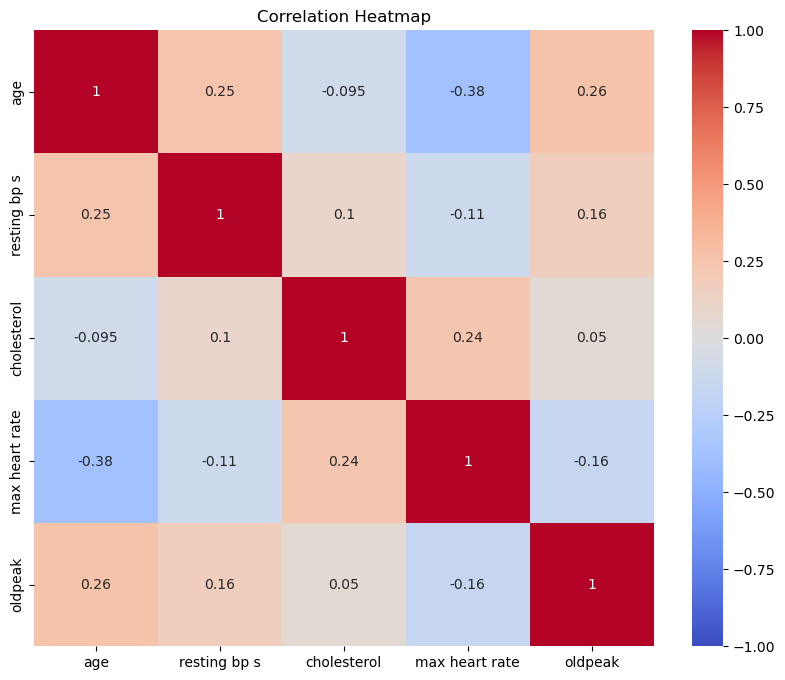

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix provides valuable insights into the relationships between various features in the dataset. Overall, it reveals:
Notable correlations include a positive relationship between age and resting blood pressure (0.25), a negative relationship between age and maximum heart rate (-0.38), and a weak positive relationship between resting blood pressure and cholesterol (0.1). These correlations help in understanding the linear relationships between different Variables.


### 2.1.1 Univariate Analysis for Numerical Variable 

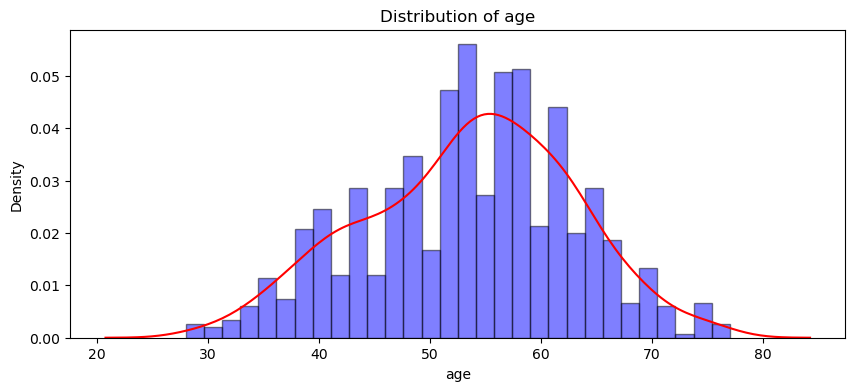

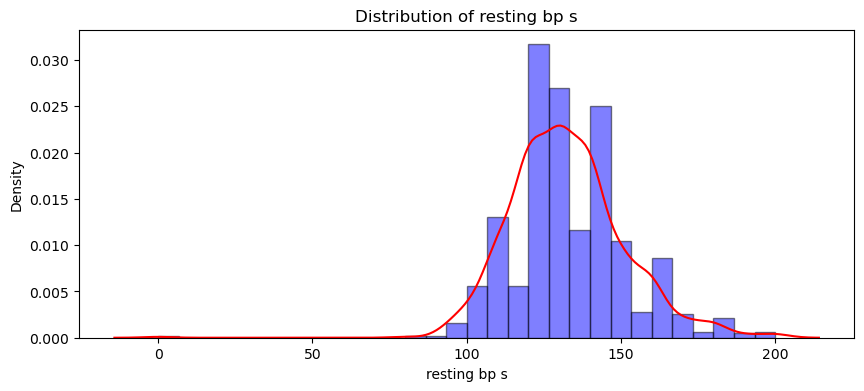

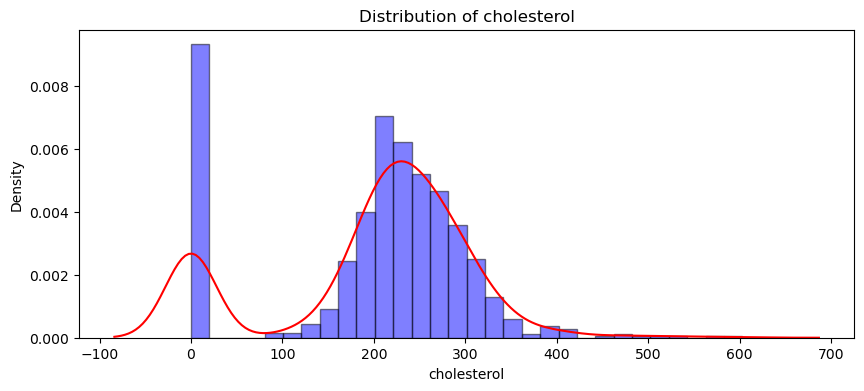

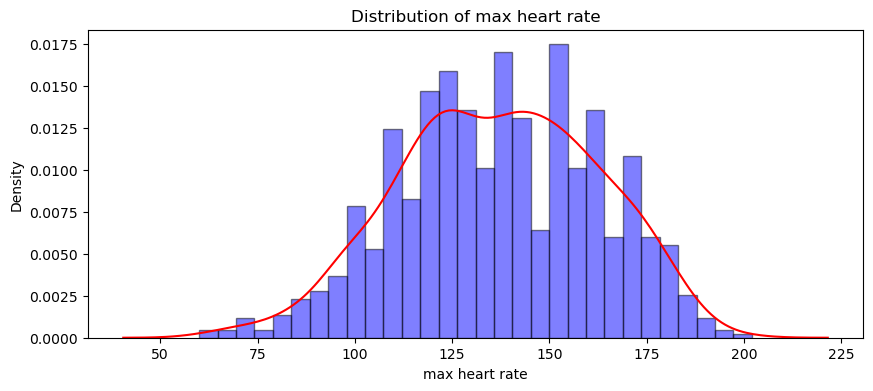

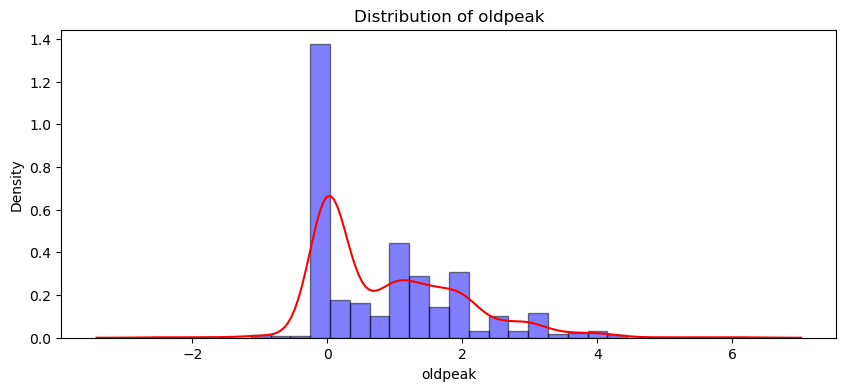

In [28]:
for col in numerical_cols:
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Plot histogram using matplotlib
    ax.hist(df[col], bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')
    
    # Plot density curve using seaborn
    sns.kdeplot(df[col], ax=ax, color='red')
        
    # Set title and labels
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    
    # Show plot
    plt.show()

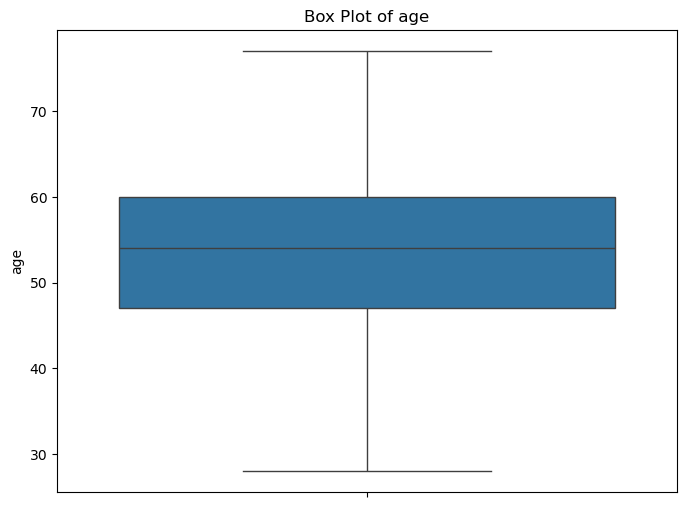

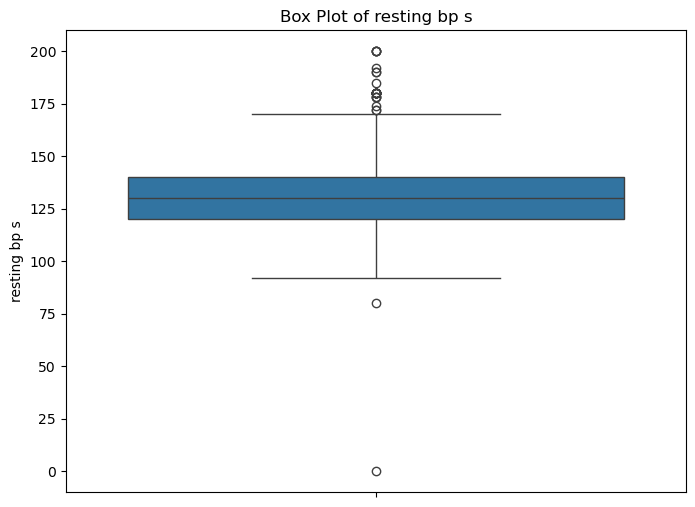

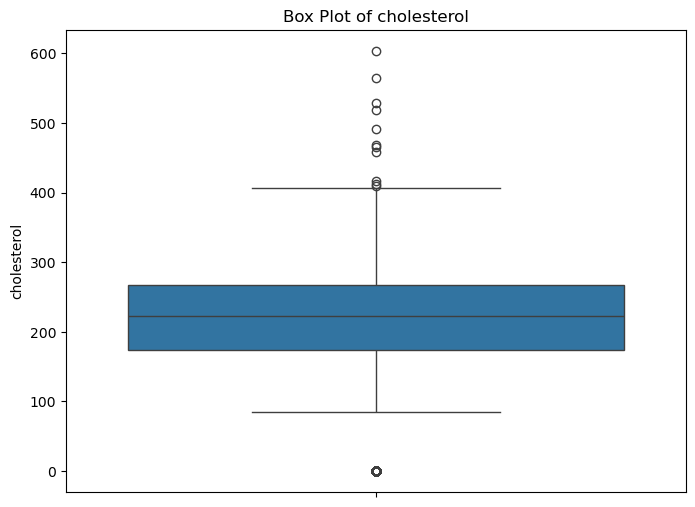

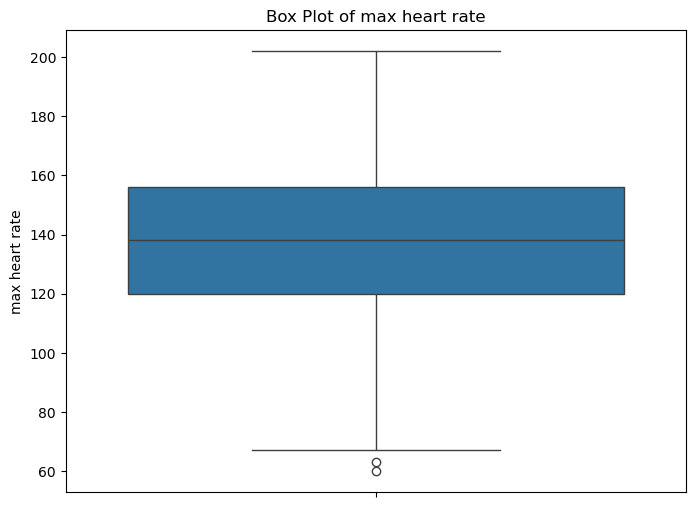

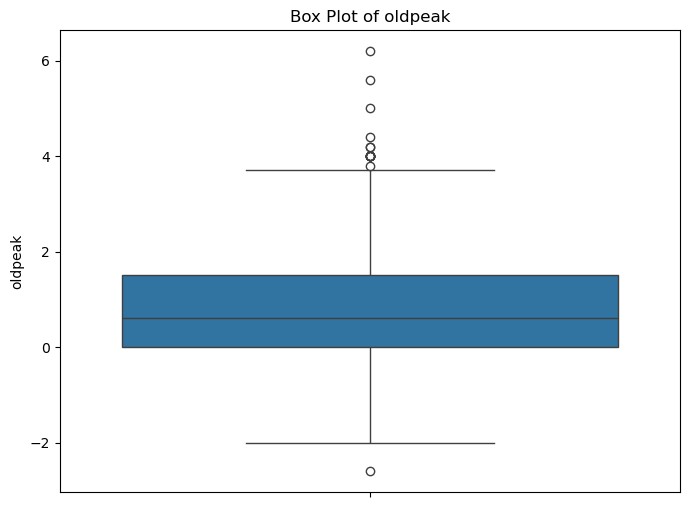

In [30]:
# Box Plots for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

### 2.1.2. Univariate Analysis for categorical variables

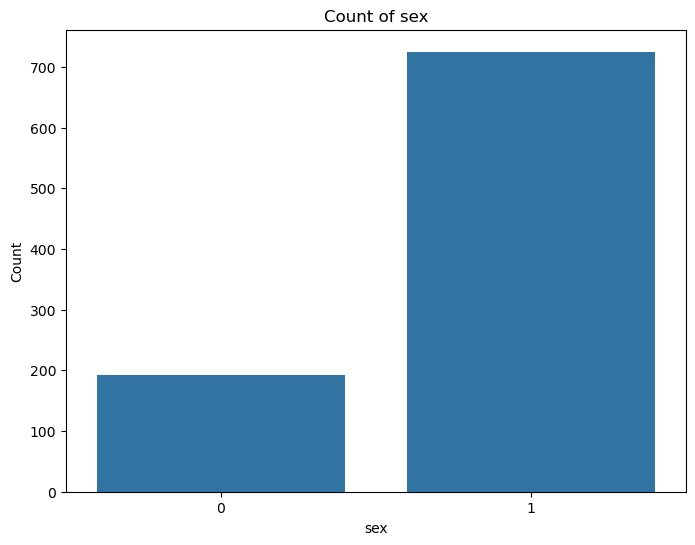

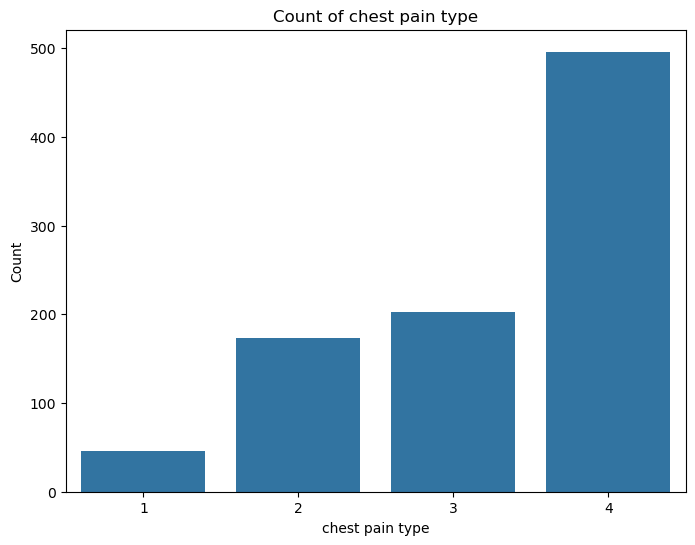

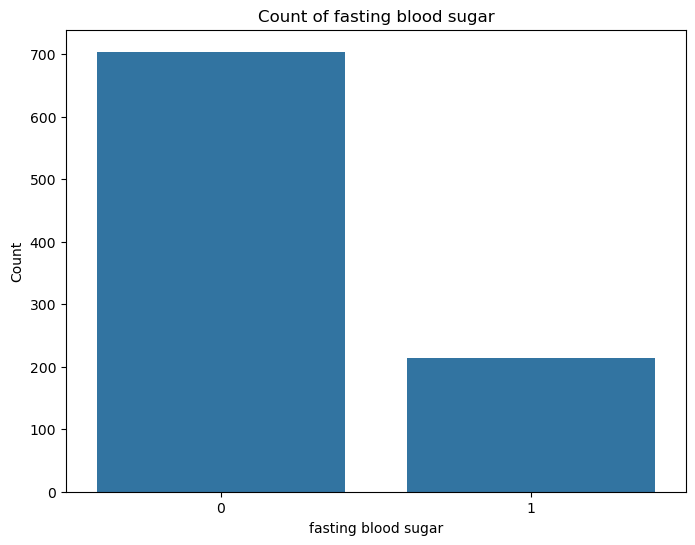

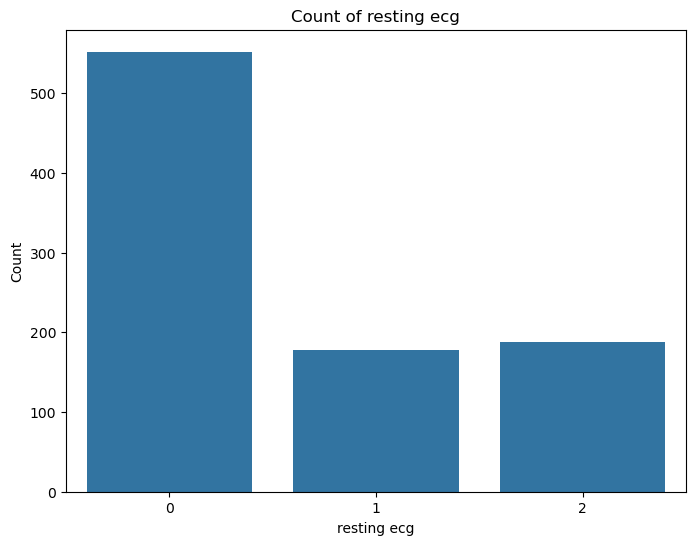

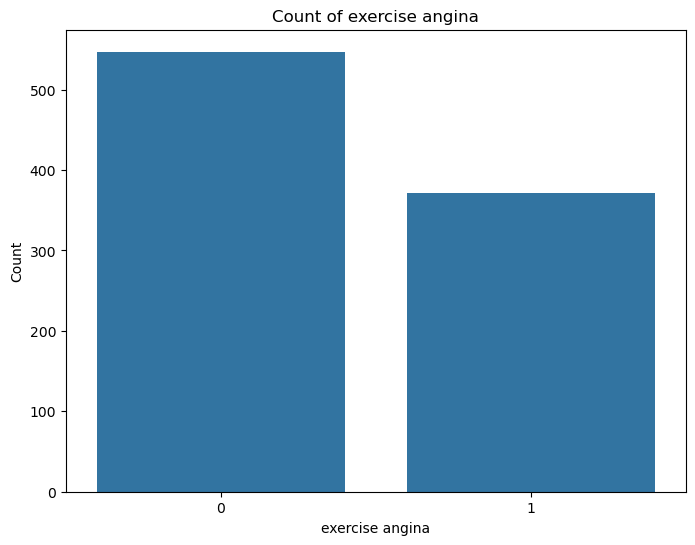

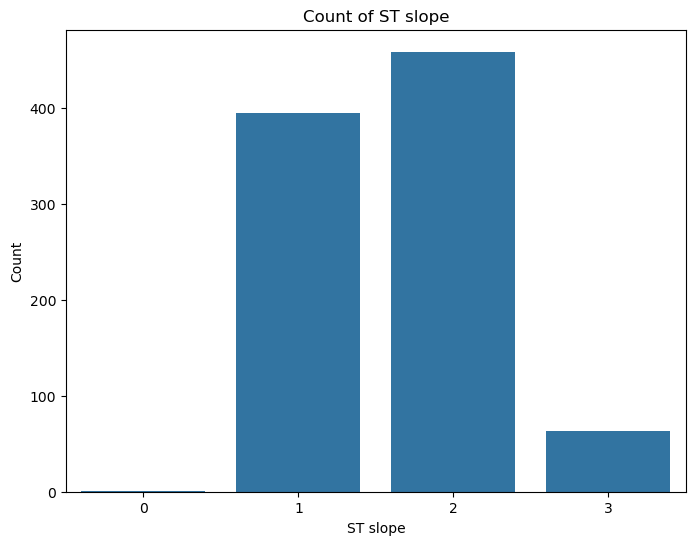

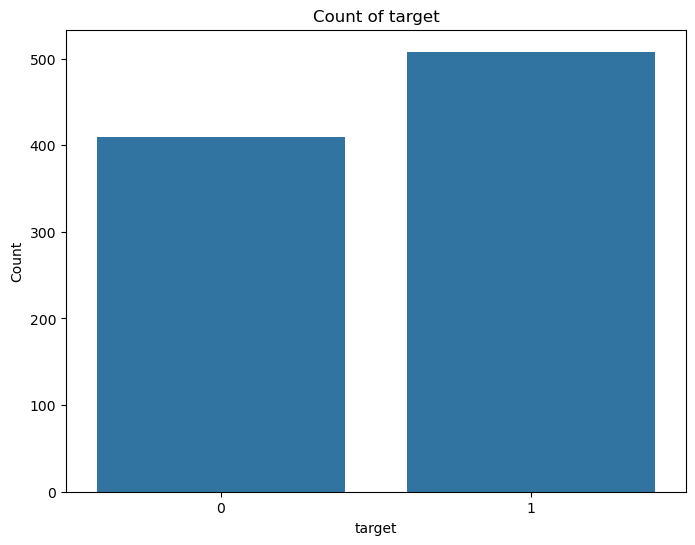

In [32]:
# Bar Charts for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### 2.2 Outlier Detection

In [34]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(df)
df["LOF"] = outliers
df["is_outlier"] = df["LOF"] == -1
# Summarize the results
num_outliers = df["is_outlier"].sum()
num_outliers

21

In [36]:
df.shape

(918, 14)

In [38]:
# Remove the outliers
df_n = df[df["is_outlier"] == False].copy()

# Optionally, you can drop the LOF and is_outlier columns if no longer needed
df_n.drop(columns=["LOF", "is_outlier"], inplace=True)
df_n.shape

(897, 12)

In [40]:
df=df_n
df.shape

(897, 12)

In [42]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.00,1,0
1,49,0,3,160,180,0,0,156,0,1.00,2,1
2,37,1,2,130,283,0,1,98,0,0.00,1,0
3,48,0,4,138,214,0,0,108,1,1.50,2,1
4,54,1,3,150,195,0,0,122,0,0.00,1,0


The LocalOutlierFactor (LOF) method was used to identify and remove outliers from a DataFrame df. Upon summarizing the results, it was found that there were 21 outliers in the dataset. These outliers were subsequently removed to ensure cleaner and more reliable data for further analysis.

## 2.3 Bivariate analysis

#### 2.3.1. Chi-square Test

In [45]:
# Chi-square Test
#Assess independence between two categorical variables.
from scipy.stats import chi2_contingency


# Contingency table
contingency_table = pd.crosstab(df['sex'], df['exercise angina'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 32.780191927671204, p-value: 1.0319101768190656e-08


Based on the Chi-square test results, we can infer that there is a significant relationship between Sex and exercise angina. Further analysis or exploration may be warranted to understand the nature and strength of this relationship.

#### 2.3.2. Correlation Analysis

In [47]:
#Correlation Analysis between Age and Cholesterol
# Correlation
correlation = df['age'].corr(df['cholesterol'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: -0.08988109656787574


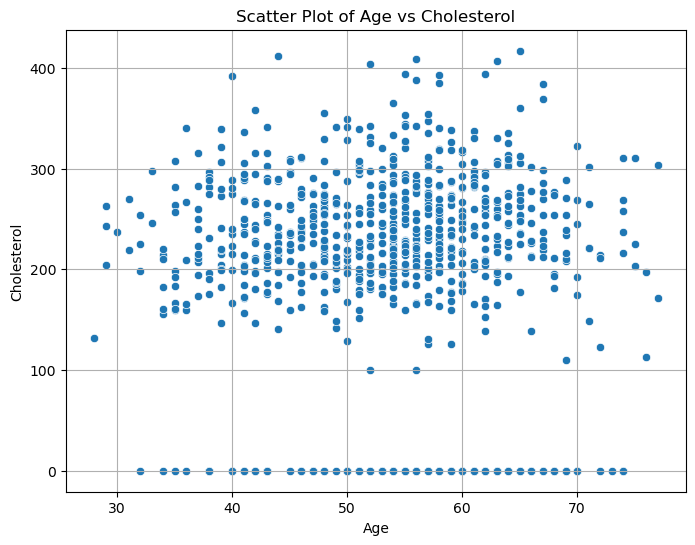

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='cholesterol', data=df)
plt.title('Scatter Plot of Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

we can infer that there is a weak negative linear relationship between Age vs Cholesterol

#### 2.3.3. T-test

In [51]:
#T-test
#Compare means Cholesterol between two sex groups.


from scipy.stats import ttest_ind


# Split data into two groups
group1 = df[df['sex'] == 1]['cholesterol']
group2 = df[df['sex'] == 0]['cholesterol']

# T-test
t_stat, p_val = ttest_ind(group1, group2)
print(f'T-statistic: {t_stat}, p-value: {p_val}')

T-statistic: -6.3714446308267245, p-value: 2.9925294278158035e-10


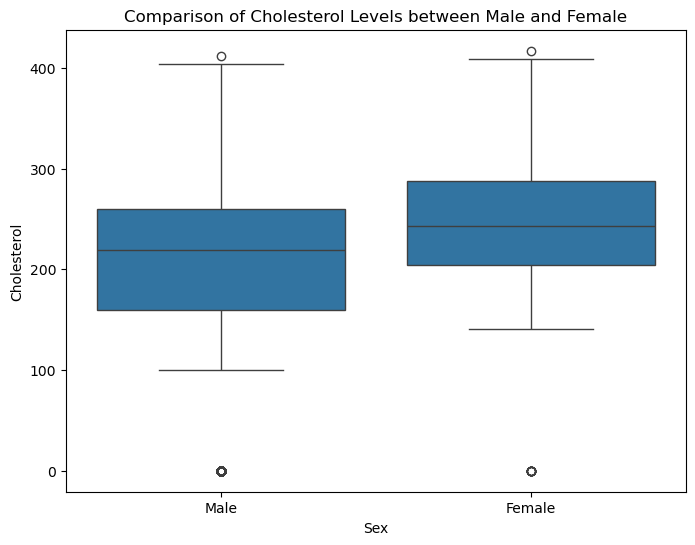

In [53]:
# Create a dataframe for the two groups
df_groups = pd.DataFrame({'Group': ['Male'] * len(group1) + ['Female'] * len(group2),
                          'Cholesterol': np.concatenate([group1, group2])})

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Cholesterol', data=df_groups)
plt.title('Comparison of Cholesterol Levels between Male and Female')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.show()

we can infer that there is a statistically significant difference between means of Male and Female cholestrol level.

#### 2.3.4. ANOVA

In [55]:
from scipy import stats

from scipy.stats import f_oneway

#Split data into groups based on 'chest pain type'
group1 = df[df['chest pain type'] == 1]['cholesterol']
group2 = df[df['chest pain type'] == 2]['cholesterol']
group3 = df[df['chest pain type'] == 3]['cholesterol']
group4 = df[df['chest pain type'] == 4]['cholesterol']

# Perform ANOVA
f_stat, p_val = f_oneway(group1, group2, group3, group4)
print(f'F-statistic: {f_stat}, p-value: {p_val}')

F-statistic: 8.47354539891436, p-value: 1.4860407898989183e-05


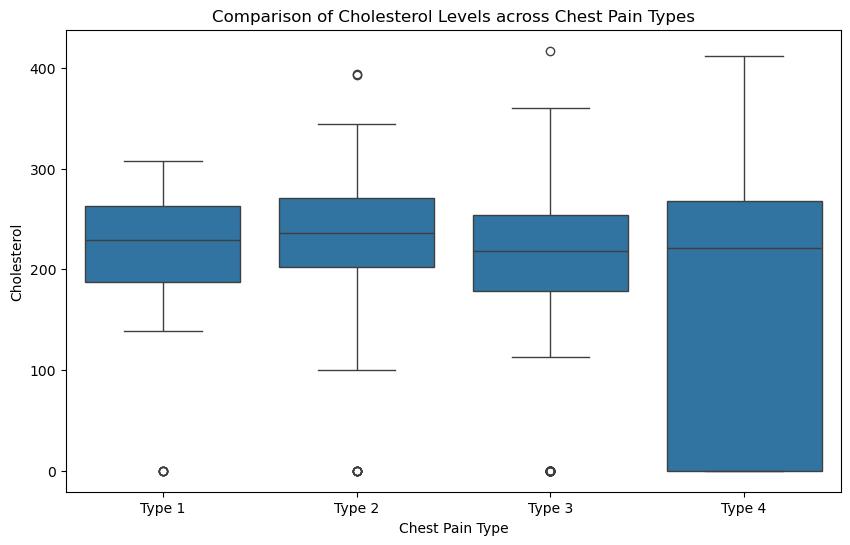

In [57]:
# Create a dataframe for the groups
df_groups = pd.DataFrame({'Chest Pain Type': ['Type 1'] * len(group1) +
                                               ['Type 2'] * len(group2) +
                                               ['Type 3'] * len(group3) +
                                               ['Type 4'] * len(group4),
                          'Cholesterol': np.concatenate([group1, group2, group3, group4])})

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Chest Pain Type', y='Cholesterol', data=df_groups)
plt.title('Comparison of Cholesterol Levels across Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol')
plt.show()

The low p-value indicates that there is strong evidence against the null hypothesis, suggesting that there are statistically significant differences between at least two of the groups' mean cholesterol levels.Based on the ANOVA results, we can infer that the type of chest pain significantly influences cholesterol levels

### 2.4. Check for presence of collinearity and multi-collinearity

In [59]:
def remove_collinear_features(df1, threshold):
    drop_cols = []
    pairs = pd.DataFrame(columns=['feature1', 'feature2', 'value'])
    cm = df1.corr().abs()  # correlation matrix
    np.fill_diagonal(cm.values, 0)  # set diagonal to 0 
    corr = [(cm.index[x], cm.columns[y], cm.iloc[x, y]) for x, y in zip(*np.where(abs(np.tril(cm)) > threshold))]  # create couple (feature1, feature2, value)
    for couple in corr:
        feature1, feature2, value = couple
        entry = {'feature1': [feature1], 'feature2': [feature2], 'value': [value]}
        temp = pd.DataFrame(entry)
        pairs = pd.concat([pairs, temp], ignore_index=True)
        drop_cols.append(feature1)

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    df1 = df1.drop(columns=drops)
    # Optionally print pairs of highly correlated features
    print(pairs)
    return df1

# Assuming your dataframe is named 'data'
# Separate predictors (features) and target variable

X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column (target)

# Remove collinear features from predictors only
X_reduced = remove_collinear_features(X, 0.6)
# Combine the reduced predictors with the target variable
data_reduced = pd.concat([X_reduced, y], axis=1)

# Display the reduced dataframe
print(data_reduced.head())

Empty DataFrame
Columns: [feature1, feature2, value]
Index: []
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0     0.00         1       0  
1            0             156                0     1.00         2       1  
2            1              98                0     0.00         1       0  
3            0             108                1     1.50         2       1  
4            0             122                0     0.00         1     

In [61]:
data_reduced.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.00,1,0
1,49,0,3,160,180,0,0,156,0,1.00,2,1
2,37,1,2,130,283,0,1,98,0,0.00,1,0
3,48,0,4,138,214,0,0,108,1,1.50,2,1
4,54,1,3,150,195,0,0,122,0,0.00,1,0


In [63]:
df = data_reduced
df.shape

(897, 12)

### 2.5.Encode the data

In [65]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['chest pain type', 'resting ecg', 'ST slope'], drop_first=True)

df_encoded = df_encoded.astype(int)
# Display the encoded dataframe
df_encoded.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_1,resting ecg_2,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0,0,1,0,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1,1,0,1,0,0,0,0,1,0
2,37,1,130,283,0,98,0,0,0,1,0,0,1,0,1,0,0
3,48,0,138,214,0,108,1,1,1,0,0,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,1,0,0,0,1,0,0


### 2.6.Split the Dataset into Training and Testing Subsets

In [452]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['target'])  # Features
y = df_encoded['target']  # Target variable

In [454]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [456]:
# Display the shapes of the resulting subsets
print("Training set (X_train) shape:", X_train.shape)
print("Testing set (X_test) shape:", X_test.shape)
print("Training set (y_train) shape:", y_train.shape)
print("Testing set (y_test) shape:", y_test.shape)

Training set (X_train) shape: (717, 16)
Testing set (X_test) shape: (180, 16)
Training set (y_train) shape: (717,)
Testing set (y_test) shape: (180,)


## 3. Modeling

### 3.1. Scale the training data and use the same scaler to also scale the test data.




In [458]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### 3.2. Principal Component Analysis (PCA)

In [75]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [77]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [79]:
explained_variance = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance)

Explained variance ratio: [2.35568985e-01 9.70773207e-02 8.97371503e-02 8.33442460e-02
 7.76777889e-02 6.74952858e-02 6.03364995e-02 5.69872845e-02
 5.17596356e-02 4.44117163e-02 3.75767626e-02 3.49114271e-02
 3.16563591e-02 2.64498776e-02 4.85688351e-03 1.52777369e-04]


In [81]:
pca.explained_variance_ratio_[:5].sum()

0.5834054910950491

In [83]:
pca.components_.shape

(16, 16)

In [85]:
cum_exp_var = []
s=0
for i in pca.explained_variance_ratio_:
    s+=i
    cum_exp_var.append(s)

Text(0, 0.5, 'Cumulative variance explained')

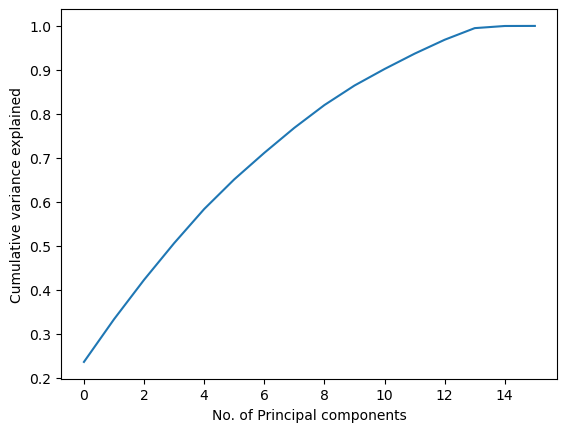

In [87]:
plt.plot(range(16),cum_exp_var) 
plt.xlabel('No. of Principal components')
plt.ylabel('Cumulative variance explained')

In [89]:
pca.explained_variance_ratio_[:14].sum()

0.9949903391243584

Given that the explained variance ratio correlates closely with the number of variables, employing PCA might unnecessarily complicate my analysis without yielding significant gains in variance explanation. Therefore, I find it preferable to adhere to the original set of variables. This approach ensures clarity and maintains the integrity of the data without introducing additional complexity.

### 3.3. LogisticRegression

#### LogisticRegression with out Balancing Class_weight

In [460]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(multi_class='ovr',solver='saga')
model.fit(X_train_scaled,y_train)
y_predP = model.predict(X_test_scaled)
print(classification_report(y_test,y_predP))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        74
           1       0.89      0.91      0.90       106

    accuracy                           0.88       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [383]:
# Initialize and fit logistic regression model with class_weight parameter
model = LogisticRegression(class_weight='balanced', multi_class='ovr', solver='liblinear')
model.fit(X_train_scaled, y_train)
# Predictions
y_predws = model.predict (X_test_scaled)
print(classification_report(y_test,y_predws))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        74
           1       0.90      0.90      0.90       106

    accuracy                           0.88       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180



In [385]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', multi_class='ovr',solver='saga')
model.fit(X_train_scaled,y_train)
y_preds = model.predict(X_test_scaled)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        74
           1       0.90      0.90      0.90       106

    accuracy                           0.88       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [387]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr',solver='saga')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67        74
           1       0.78      0.71      0.74       106

    accuracy                           0.71       180
   macro avg       0.71      0.71      0.71       180
weighted avg       0.72      0.71      0.71       180



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


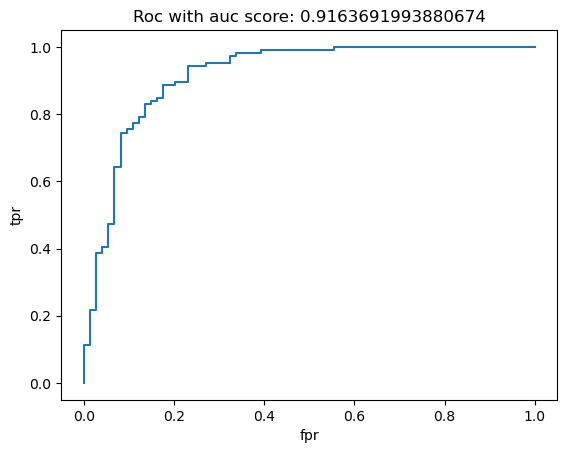

In [379]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

#### Checking for Overfitting 

In [391]:




# Initialize logistic regression model
model = LogisticRegression(class_weight='balanced', multi_class='ovr', solver='liblinear')

# Initialize a scaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model on training data
model.fit(X_train_scaled, y_train)

# Predictions on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.87
Test Accuracy: 0.88


In [479]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

model = LogisticRegression(class_weight='balanced', multi_class='ovr', solver='liblinear')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

Cross-validation scores: [0.86805556 0.86805556 0.85314685 0.85314685 0.88111888]
Mean cross-validation score: 0.86


No Significant Overfitting: Since accuracies are close, there is no strong indication of overfitting in this case.

### 3.4. DecisionTreeClassifier

In [393]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
train_scores = []
test_scores = []

for i in range(1,11,1):
    model = DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    score_tr = accuracy_score(y_train, y_pred_tr)
    #kfold_score = cross_val_score(model, X_train, y_train, cv = 5).mean()
    train_scores.append(score_tr)
    y_pred_te = model.predict(X_test)
    score_te = accuracy_score(y_test, y_pred_te)
    test_scores.append(score_te)

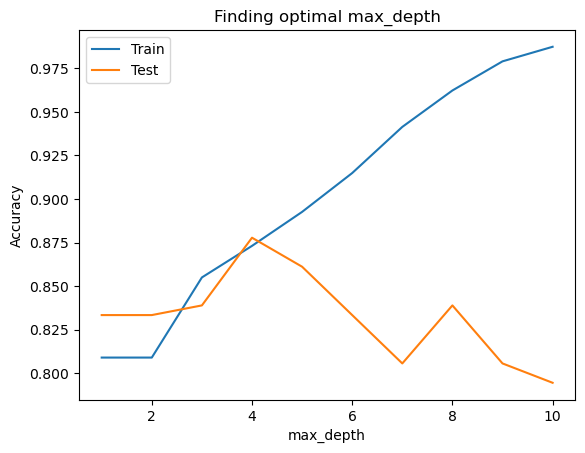

In [395]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1), train_scores, label="Train")
plt.plot(range(1,11,1), test_scores, label="Test")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Finding optimal max_depth")
plt.legend()
plt.show()

In [397]:
model2 = DecisionTreeClassifier(class_weight='balanced', max_depth=2)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        74
           1       0.87      0.84      0.86       106

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.84      0.83      0.83       180



In [399]:
model3 = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        74
           1       0.89      0.79      0.84       106

    accuracy                           0.82       180
   macro avg       0.82      0.83      0.82       180
weighted avg       0.83      0.82      0.82       180



In [401]:
model4 = DecisionTreeClassifier(max_depth=4, class_weight='balanced')
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        74
           1       0.89      0.88      0.88       106

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [403]:
model5 = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
model5.fit(X_train,y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        74
           1       0.88      0.85      0.87       106

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180



In [405]:
model6 = DecisionTreeClassifier(max_depth=6, class_weight='balanced')
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        74
           1       0.89      0.85      0.87       106

    accuracy                           0.85       180
   macro avg       0.84      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



### Checking For Overfitting For DT

In [462]:

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.87
Test Accuracy: 0.88


 This suggests that this Decision Tree model is performing consistently well on both the training and test datasets. This generally indicates that the model is neither overfitting nor underfitting, as its performance is similar on both seen (training) and unseen (test) data.

 ### 3.5.RandomForest 

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [409]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_predRF = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_predRF))



              precision    recall  f1-score   support

           0       0.86      0.84      0.85        74
           1       0.89      0.91      0.90       106

    accuracy                           0.88       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180



In [129]:
# Feature Importance 
feature_importances = model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

                Feature  Importance
13           ST slope_1        0.15
5        max heart rate        0.11
10    chest pain type_4        0.10
3           cholesterol        0.10
6       exercise angina        0.09
14           ST slope_2        0.08
0                   age        0.08
2          resting bp s        0.08
7               oldpeak        0.07
1                   sex        0.04
4   fasting blood sugar        0.02
8     chest pain type_2        0.02
12        resting ecg_2        0.02
9     chest pain type_3        0.02
11        resting ecg_1        0.01
15           ST slope_3        0.01


In [133]:
from sklearn.model_selection import cross_val_score

In [411]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
test_scores = []
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

for i in range(10,201,10):
    
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=0), #default: n_estimators=100
                                  X_train,y_train,cv=4).mean())
    clf = RandomForestClassifier(n_estimators=i,random_state=42).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_pred))

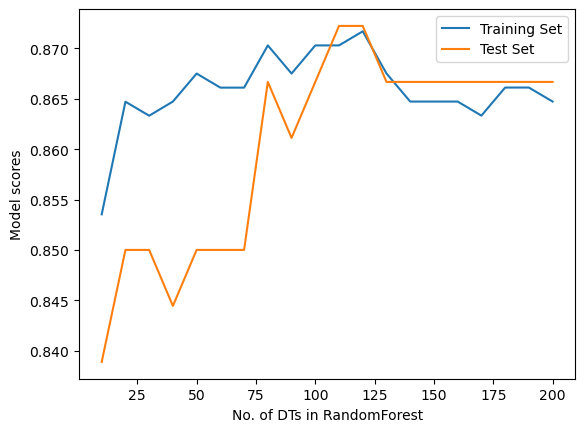

In [413]:
plt.plot(range(10,201,10),scores, label ='Training Set')
plt.plot(range(10,201,10),test_scores, label = 'Test Set')
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('Model scores')
plt.legend()
plt.show()

In [139]:
scores

[0.8535304158907511,
 0.864703600248293,
 0.8633147113594041,
 0.8647191185599007,
 0.8674968963376785,
 0.8661002482929857,
 0.8661002482929857,
 0.870290192427064,
 0.8674968963376785,
 0.870290192427064,
 0.870290192427064,
 0.8716868404717567,
 0.8675046554934824,
 0.8647191185599008,
 0.8647191185599008,
 0.8647191185599008,
 0.863322470515208,
 0.8661080074487897,
 0.8661080074487897,
 0.8647191185599008]

In [415]:
from sklearn.model_selection import GridSearchCV

p = {'n_estimators':[50,100, 130],
     'max_depth':[None,8,10, 15],
     'min_samples_split':[3,5,10, 15],
     'criterion':['entropy','gini']}
RF = RandomForestClassifier(random_state=42)
GS = GridSearchCV(RF, p, cv=5, scoring='f1', n_jobs=-1)
GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 8, 10, 15],
                         'min_samples_split': [3, 5, 10, 15],
                         'n_estimators': [50, 100, 130]},
             scoring='f1')

In [417]:
best_model = GS.best_estimator_
best_model

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=130, random_state=42)

In [466]:
model = RandomForestClassifier(class_weight='balanced',criterion='entropy',
                               max_depth=10, min_samples_split=5, n_estimators=100,
                             random_state=42)
model.fit(X_train, y_train)

# Predictions
y_predRF2 = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_predRF2))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        74
           1       0.89      0.92      0.91       106

    accuracy                           0.89       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.89      0.89       180



In [468]:
model = RandomForestClassifier(class_weight='balanced', criterion='entropy', 
                               max_depth=10, min_samples_split=5, random_state=42, n_estimators=130)
model.fit(X_train, y_train)

# Predictions
y_predRF3 = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_predRF3))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        74
           1       0.89      0.91      0.90       106

    accuracy                           0.88       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180



In [472]:
model = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth=10, min_samples_split=5, random_state=42, n_estimators=120)
model.fit(X_train, y_train)

# Predictions
y_predRF4 = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_predRF4))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        74
           1       0.88      0.92      0.90       106

    accuracy                           0.88       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180



In [464]:
model = RandomForestClassifier(class_weight='balanced', max_depth=None, criterion='entropy', min_samples_split=5, random_state=42, n_estimators=120)
model.fit(X_train, y_train)

# Predictions
y_predRF5 = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_predRF5))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        74
           1       0.89      0.91      0.90       106

    accuracy                           0.88       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180



In [429]:
model = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=None, min_samples_split=3, random_state=42, n_estimators=120)
model.fit(X_train, y_train)

# Predictions
y_predRF6 = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_predRF6))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        71
           1       0.90      0.87      0.88       109

    accuracy                           0.86       180
   macro avg       0.85      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [476]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

Cross-validation scores: [0.86805556 0.86805556 0.85314685 0.85314685 0.88111888]
Mean cross-validation score: 0.86


### Check Overfitting RF 

In [474]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(class_weight='balanced',criterion='entropy', max_depth=10, min_samples_split=5, n_estimators=100,
                             random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.97
Test Accuracy: 0.89


### 3.6.Support Vector Machines (SVM)

In [481]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize SVM
svm = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.87


In [483]:
# Evaluate the best model on the test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, best_svm.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print detailed classification report
print("\nClassification Report for Test Set:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.88
Test Accuracy: 0.89

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        74
           1       0.90      0.92      0.91       106

    accuracy                           0.89       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.89      0.89       180



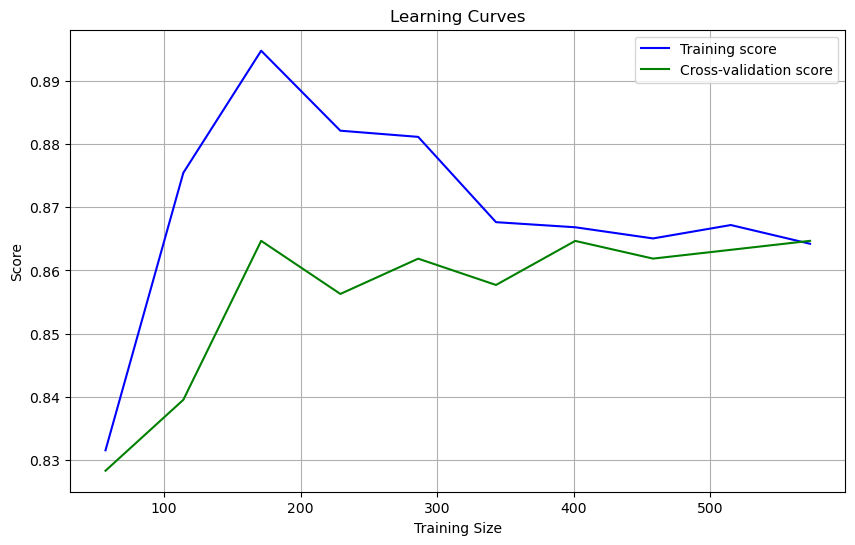

In [485]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='green')

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## 4. Conclusion
In our exploration of cardiovascular health data using machine learning modeling, we achieved significant insights and predictive capabilities:

#### Model Performance:

The Random Forest model emerged as the most accurate, demonstrating superior ability in predicting cardiovascular events.
Robust Evaluation:

Cross-validation techniques confirmed the reliability and robustness of the model’s performance, ensuring consistent results across different subsets of data.
#### Key Predictors:

Important features such as age, cholesterol levels, and blood pressure were identified as critical factors influencing cardiovascular health outcomes.
Predictive Power:

The developed models, particularly the Random Forest, showcased strong predictive power, making them valuable tools for early detection and personalized healthcare.
Utility in Healthcare:

These models provide actionable insights that can enhance preventive measures and treatment plans, ultimately improving patient outcomes.
## 5. Recommendations
#### Deploy Random Forest Model:

Implement the Random Forest model in clinical settings for accurate prediction of cardiovascular health outcomes.
#### Expand Data Integration:

Incorporate additional data sources such as genetic profiles, lifestyle factors, and comprehensive health records to further enhance model accuracy and predictive power.
#### Conduct Real-World Trials:

Validate the model's performance in real-world clinical environments to ensure its practical applicability and reliability.
#### Ongoing Feature Analysis:

Continuously update and refine the model by analyzing new data and emerging research to maintain its effectiveness.
#### System Integration:

Collaborate with healthcare providers to seamlessly integrate the model into electronic health record systems, facilitating its use in routine clinical practice for early intervention and personalized care.